In [254]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
from sklearn.linear_model import LinearRegression
import scipy.linalg as spla
import seaborn as sns
from scipy import stats 

# 3. Generate simulation study 

## 3.1. Experimental data simulation

In [240]:
random.seed(10)
#number of observations
n = 800
#number of covariates
k = 7

In [241]:
def mutlivariate_normal_sampler(mean,covariance,n_samples):
  # compute cholesky decomposition of covariance matrix
  L = spla.cholesky(covariance)
  # Generate white guassian noise, 
  Z = np.random.normal(size=(n_samples,covariance.shape[0]))
  return Z.dot(L)+mean


# Array of covariance from lalonde 
#cov_array = mutlivariate_normal_sampler(mu,cov_matrix,n_samples=n) 
#row_index = pd.RangeIndex(range(cov_array.shape[0]))
#col_index = pd.RangeIndex(range(cov_array.shape[1]))
#df_e = pd.DataFrame(data=cov_array, index = row_index,columns= col_index)

# Lalonde dataset
df = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/nsw.dta")

#del df['data_id']
#del df['treat']
#del df['re78']

#df['re75'] =  df['re75']/100

# Get covariance matrix from data
#cov_matrix = df.cov()
#cov_matrix = cov_matrix*((n-1)**2/n)


In [295]:
# Generate variables (Measured covariates, unmeasured covariates , binary treatment and assignment).

df_e = pd.DataFrame()

# Generate covariance matrix
A = random.uniform(k, k) 
# Allow for negative correlations
overlay_matrix = np.random.randint(2, size=(k, k))
overlay_matrix[overlay_matrix == 0] = -1
# correct for the number of covariates
A = (10/(k)) * A * overlay_matrix
# Assuring positive definitness         
sigma = np.dot(A, A.transpose())  
# Expected values
mu = np.repeat(0, k)
# Final covariates
X = np.random.multivariate_normal(mu, sigma, n)
#Create dataframe frame of covariates
row_index = pd.RangeIndex(range(X.shape[0]))
col_index = pd.RangeIndex(range(X.shape[1]))
df_e = pd.DataFrame(data=X, index = row_index,columns= col_index)

# Generate Pre-treatment covariates

# mean
mu2 = 0 
#variance
sigma2 = 1 

#name columns
df_e.columns=['X'+str(i) for i in range(0,k)]

# Binary treatment assignment W (drawn from bernoulli dsitribution with p = 0.5 )
p_bernoulli = 0.5
W_uniform = np.random.rand(n) #treatment from uniform distribution
df_e['W'] = (W_uniform <= p_bernoulli).astype(np.int32) # transform to bernoulli

# Generate outcome variable 

#Dummy variable for treatment 
df_e['D'] = df_e['W']
#Error term
epsilon = np.random.normal(mu2,sigma2 , size = (n,)) # Error term 
#Linear additive relationship for covariates 
sumcovariates = df_e.iloc[0:n,0:7].sum(axis=1)
# Constant treatment effect t
tau = 3
#Outcome  
df_e['Y'] = tau*df_e['D'] + sumcovariates + epsilon


df_e

,X0,X1,X2,X3,X4,X5,X6,W,D,Y
0,4.693537,-8.796275,40.962515,-15.602478,18.109517,-34.333146,56.623831,1,1,63.197049
1,5.703498,34.790902,17.918605,44.363328,-2.934485,24.106382,16.260168,1,1,145.141240
2,-24.477193,-32.418150,-30.730954,5.782991,-3.916684,-0.657605,7.657043,1,1,-73.238594
3,-13.196250,-17.207082,-7.174645,-20.117232,-14.885228,-6.077582,-3.381027,1,1,-79.136691
4,-38.210167,21.077419,-0.012350,-8.433581,-19.142433,-6.105271,4.222973,0,0,-47.156125
...,...,...,...,...,...,...,...,...,...,...
795,22.170476,8.960111,-1.277831,-16.070683,15.731438,-14.626169,-32.457948,0,0,-16.893104
796,-27.363851,-8.292266,16.485541,3.827887,-24.233773,-15.214652,-3.550062,0,0,-57.838485
797,-31.975627,-48.370019,5.817255,-5.238082,-47.047893,-22.150292,-0.556746,1,1,-145.845895
798,-23.801769,-20.578729,8.510112,3.124763,-38.064850,-23.355096,-14.360249,0,0,-106.509539


In [252]:
#plot correlation matrix for the simulated RCT 
corr = df_e.corr()
corr.style.background_gradient(cmap='vlag')

,X0,X1,X2,X3,X4,X5,X6,W,D,Y
X0,1.000000,-0.160892,-0.111404,0.459752,0.206812,-0.152279,-0.723900,-0.001911,-0.001911,0.235214
X1,-0.160892,1.000000,-0.178736,0.409592,-0.489249,-0.713810,-0.141005,-0.020614,-0.020614,-0.110977
X2,-0.111404,-0.178736,1.000000,0.416486,0.703880,0.472585,-0.170500,-0.029932,-0.029932,0.901275
X3,0.459752,0.409592,0.416486,1.000000,0.148183,-0.154570,-0.739412,-0.030776,-0.030776,0.663220
X4,0.206812,-0.489249,0.703880,0.148183,1.000000,0.201107,0.082540,-0.044871,-0.044871,0.787589
X5,-0.152279,-0.713810,0.472585,-0.154570,0.201107,1.000000,-0.107158,0.036257,0.036257,0.221473
X6,-0.723900,-0.141005,-0.170500,-0.739412,0.082540,-0.107158,1.000000,-0.012970,-0.012970,-0.350539
W,-0.001911,-0.020614,-0.029932,-0.030776,-0.044871,0.036257,-0.012970,1.000000,1.000000,-0.020436
D,-0.001911,-0.020614,-0.029932,-0.030776,-0.044871,0.036257,-0.012970,1.000000,1.000000,-0.020436
Y,0.235214,-0.110977,0.901275,0.663220,0.787589,0.221473,-0.350539,-0.020436,-0.020436,1.000000


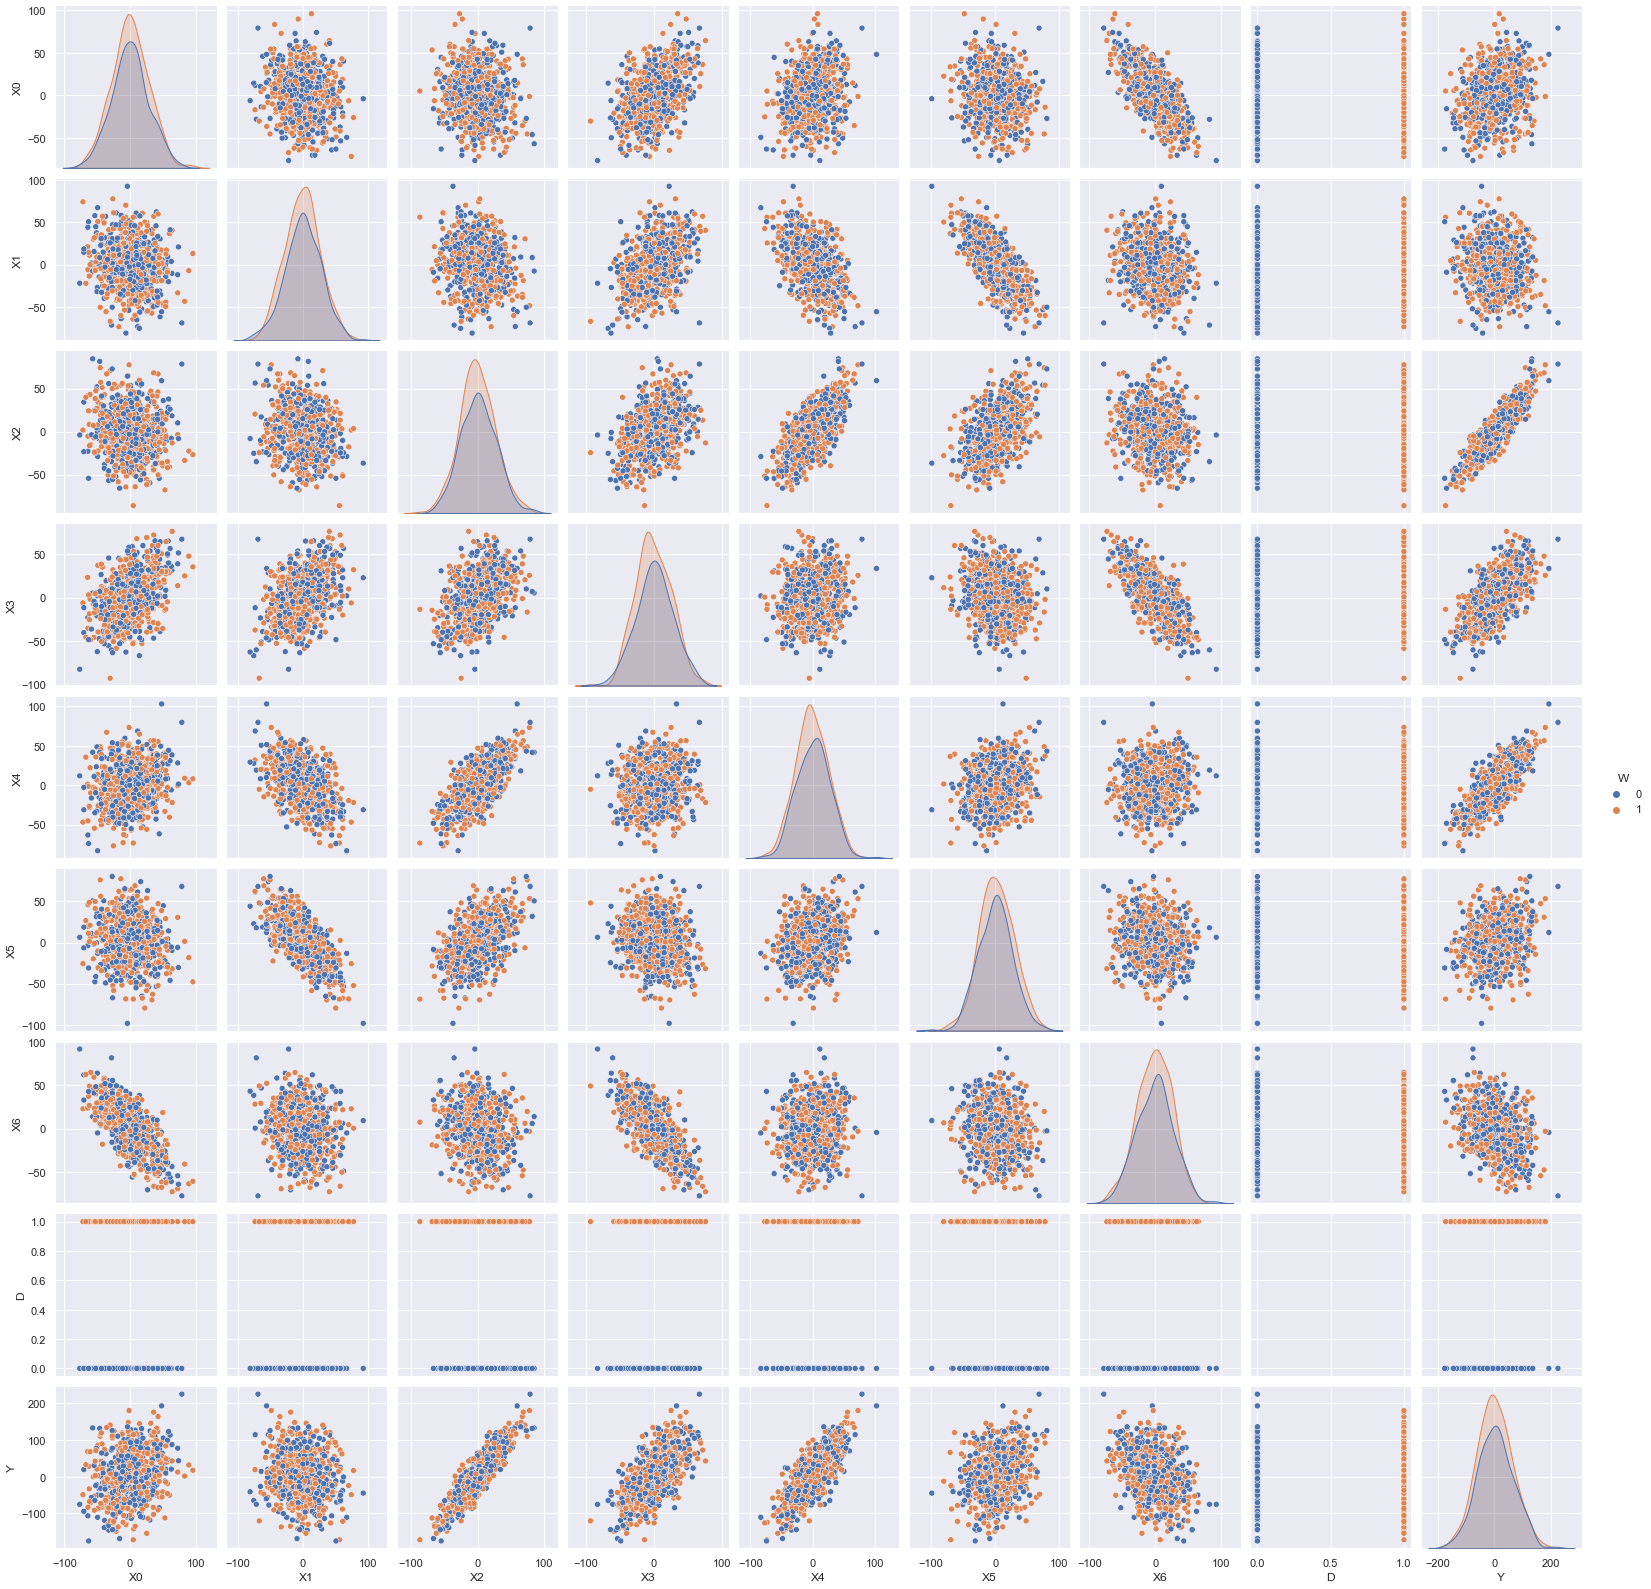

In [253]:
sns.pairplot(df_e, hue = "W")

## 3.2 Simulate ODB

In [311]:
n = 1000
n = n_odb

In [312]:
# Generate variables (Measured covariates, unmeasured covariates , binary treatment and assignment).

df_o = pd.DataFrame()

# Generate covariance matrix
A = random.uniform(k, k) 
# Allow for negative correlations
overlay_matrix = np.random.randint(2, size=(k, k))
overlay_matrix[overlay_matrix == 0] = -1
# correct for the number of covariates
A = (10/(k)) * A * overlay_matrix
# Assuring positive definitness         
sigma = np.dot(A, A.transpose())  
# Expected values
mu = np.repeat(0, k)
# Final covariates
X = np.random.multivariate_normal(mu, sigma, n )
#Create dataframe frame of covariates
row_index = pd.RangeIndex(range(X.shape[0]))
col_index = pd.RangeIndex(range(X.shape[1]))

df_o = pd.DataFrame(data=X, index = row_index,columns= col_index)

# Generate Pre-treatment covariates
# mean
mu2 = 0 
#variance
sigma2 = 1 

#name columns
df_o.columns=['X'+str(i) for i in range(0,k)]

# Treatment assignment 

# Creating index for selection of covariates into Z (here X_a)
set_of_treatmeant_assignment = np.int32(k/2)
a_idx = np.concatenate((np.zeros(k - set_of_treatmeant_assignment),np.ones(set_of_treatmeant_assignment)))

np.random.shuffle(a_idx)
# creating Z
X_a = X[:, a_idx == 1].copy()

# create eta
eta = np.random.normal(0,1, n)

# Create vector a with Z*b + eta
weights_vector = np.random.uniform(0,1,size=(k,))
a = np.dot(X_a, weights_vector[a_idx == 1]) + eta 

# Using empirical mean and sd
a_mean = np.mean(a) 
a_sigma = np.std(a)

# normalizing 'a' vector and adjust if chosen
z = (a - a_mean) / a_sigma  #z_adjustment    

# using normalized vector z to get probabilities from normal pdf
m_0 = stats.norm.cdf(z)

# creating array out of binomial distribution that assigns treatment according to probability m_0
D = np.random.binomial(1, m_0, n)
row_index = pd.RangeIndex(range(D.shape[0]))
D_df = pd.DataFrame(data=D, index = row_index)

# Generate outcome variable 
#Dummy variable for treatment 
df_o['D'] = D_df 
#Error term
epsilon = np.random.normal(mu2,sigma2 , size = (n,)) # Error term 
#Linear additive relationship for covariates 
sumcovariates = df_o.iloc[0:n,0:7].sum(axis=1)
# Constant treatment effect t
tau = 3
#Outcome  
df_o['Y'] = tau*df_o['D'] + sumcovariates + epsilon

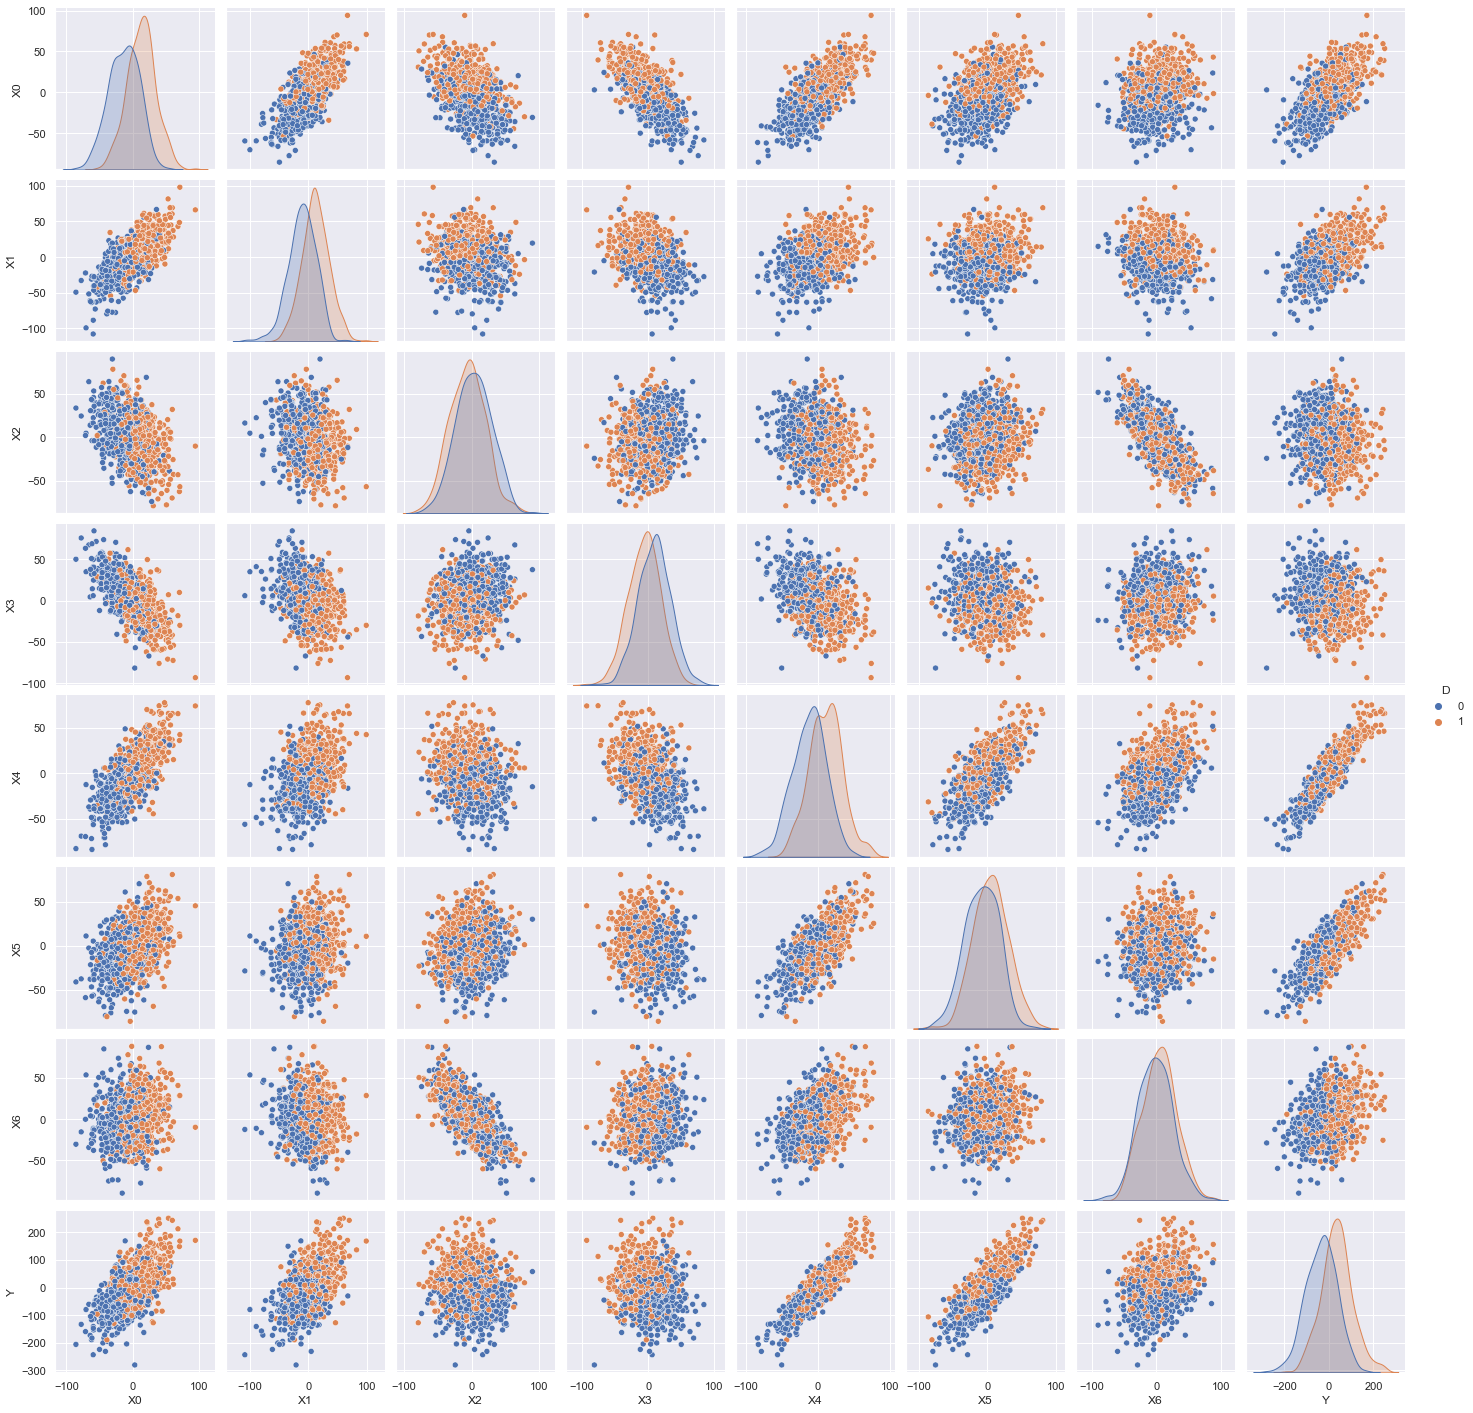

In [313]:
sns.pairplot(df_o, hue = "D")

# 4 Data analysis

In [307]:
X.leg

array([  7.29791927,  20.16576998, -31.68330352,  -2.04465329,
        -0.74148998, -20.3615658 ,  17.51228955])